In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from pathlib import Path
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
import numpy as np
from glob import glob
from skimage.io import imread
# BASE_IMG_PATH=Path("/net/scratch/chacha/picai_data/input/images")
BASE_IMG_PATH=Path("/net/scratch/chacha/picai_data/workdir/nnUNet_raw_data/Task2204_picai_baseline")

In [4]:
all_images= glob(os.path.join(BASE_IMG_PATH,'imagesTr','*'))
all_masks = glob(os.path.join(BASE_IMG_PATH,'labelsTr','*'))
print(len(all_images),' matching files found:',all_images[0], all_masks[0])

30  matching files found: /net/scratch/chacha/picai_data/workdir/nnUNet_raw_data/Task2204_picai_baseline/imagesTr/10000_1000000_0002.nii.gz /net/scratch/chacha/picai_data/workdir/nnUNet_raw_data/Task2204_picai_baseline/labelsTr/10003_1000003.nii.gz


In [7]:
all_images = sorted(all_images)

(384, 384, 19)


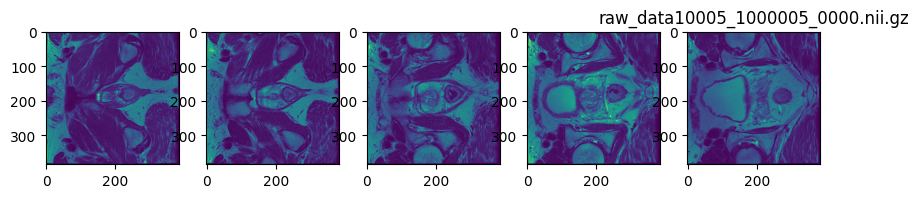

(384, 384, 19)


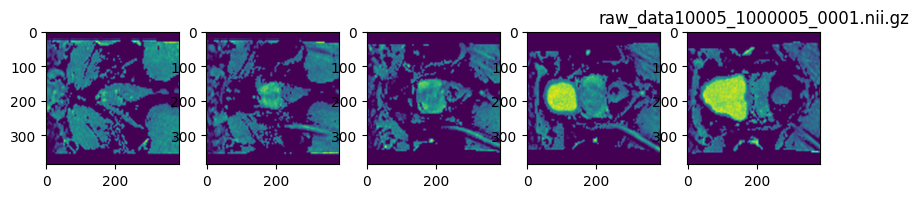

(384, 384, 19)


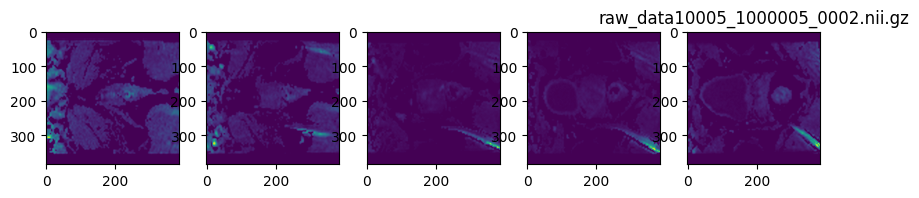

(384, 384, 21)


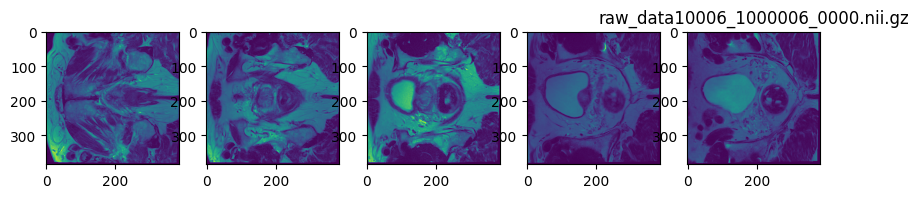

(384, 384, 21)


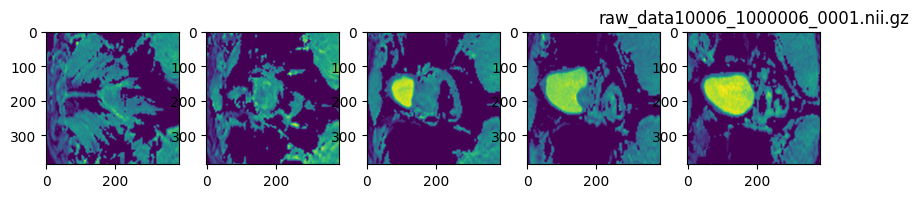

(384, 384, 21)


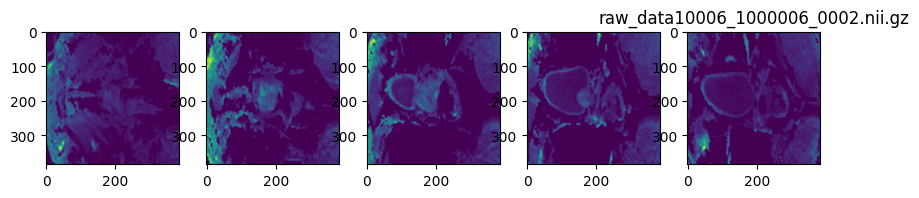

(640, 640, 19)


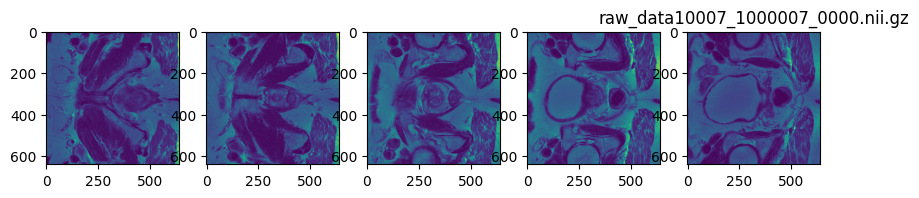

(640, 640, 19)


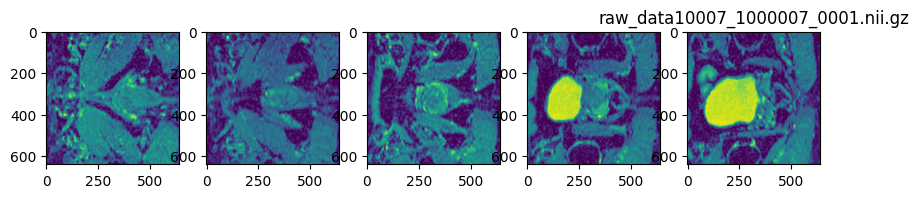

(640, 640, 19)


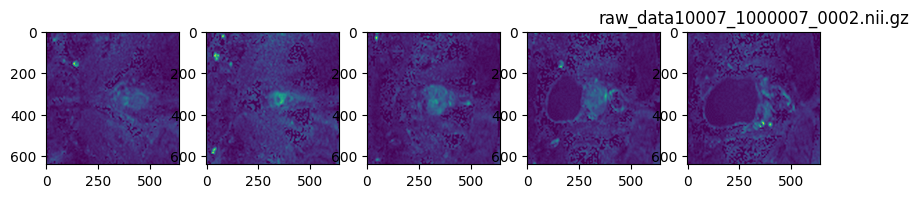

(384, 384, 21)


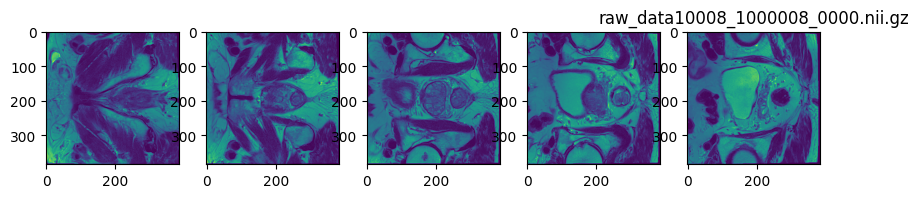

(384, 384, 21)


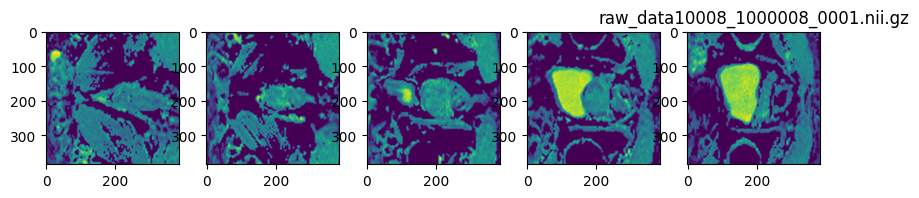

(384, 384, 21)


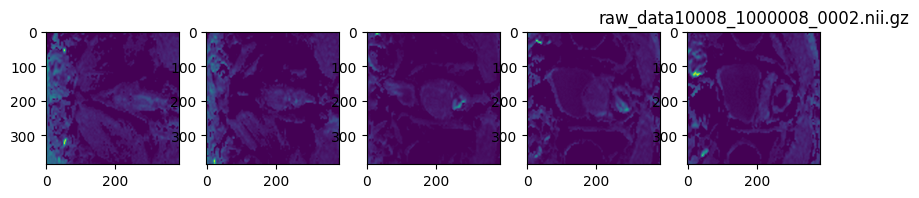

(1024, 1024, 27)


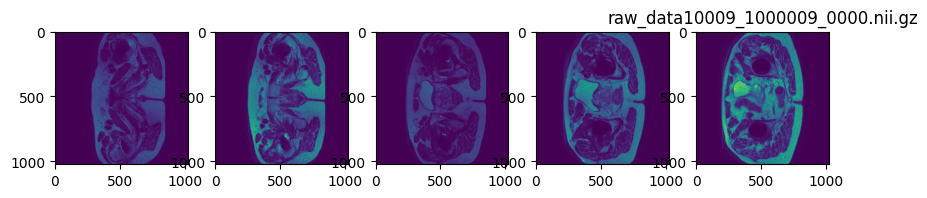

(1024, 1024, 27)


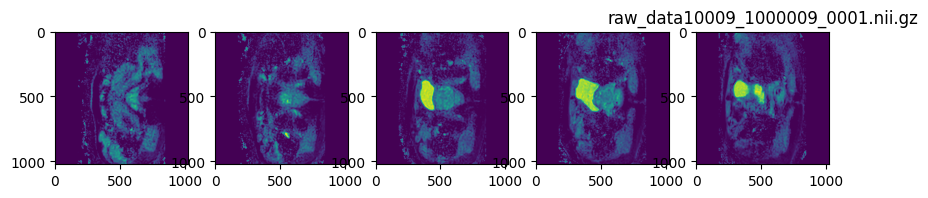

(1024, 1024, 27)


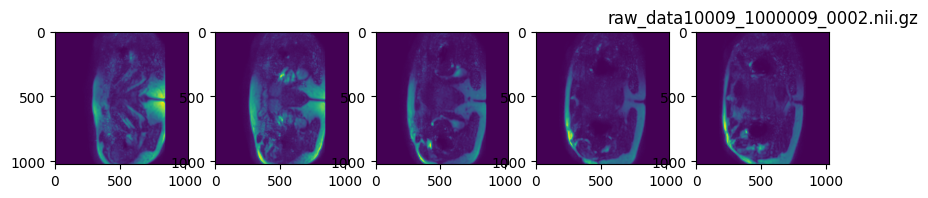

In [11]:
%matplotlib inline
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')


def show_slices(test_image, title):
    # test_image=nib.load(all_images[0]).get_fdata()
    # test_mask=nib.load(all_masks[0]).get_fdata()
    ct = 0
    for i in range(0,test_image.shape[-1],test_image.shape[-1]//5+1):
        plt.subplot(5, 5,ct + 1)
        ct +=1
        plt.imshow(test_image[:,:,i])
        plt.gcf().set_size_inches(10, 10)
    plt.title(title)
    plt.show()

i=5
for image in all_images[3*i:6*i]:
    test_image = nib.load(image).get_fdata()
    print(test_image.shape)
    show_slices(test_image, title = "raw_data"+image.split('/')[-1])
    
    # image.replace("nnUNet_raw_data","nnUNet_preprocessed")
    # test_image = nib.load(image).get_fdata()
    # print(test_image.shape)
    # show_slices(test_image, title = "preprocessed"+image.split('/')[-1])
    
    # image.replace("nnUNet_raw_data","nnUNet_cropped_data")
    # test_image = nib.load(image).get_fdata()
    # print(test_image.shape)
    # show_slices(test_image, title = "cropped"+image.split('/')[-1])

# fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
# ax1.imshow(test_image[test_image.shape[0]//2])
# ax1.set_title('Image')
# ax2.imshow(test_mask[test_image.shape[0]//2])
# ax2.set_title('Mask')

In [37]:
test_image[test_image.shape[0]//2].shape
test_image.shape
# image.split('/')[-1]
image.replace("nnUNet_raw_data","nnUNet_preprocessed")

'/net/scratch/chacha/picai_data/workdir/nnUNet_preprocessed/Task2204_picai_baseline/imagesTr/10008_1000008_0002.nii.gz'

In [12]:
test_image.shape[0]//2

320

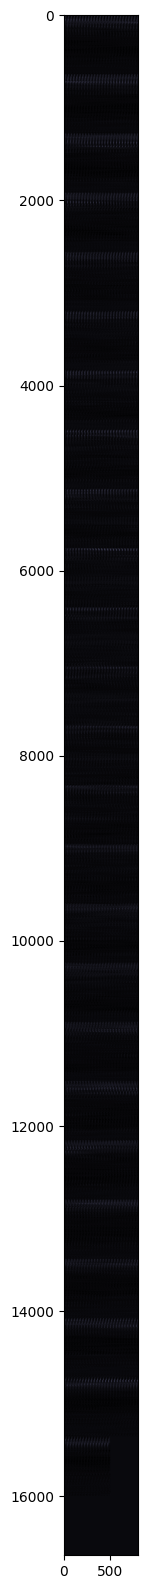

In [16]:
from skimage.util import montage
fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(montage(test_image), cmap ='bone')


In [ ]:
# from skimage.util.montage